In [45]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import geopandas
import seaborn as sns 
import numpy as np 

In [46]:
df = pd.read_table('./df_cl',sep =',',low_memory=False)

In [47]:
df.head()

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,...,FED_AGENCY,DATE_LAST_UPDATE,TYPE_LAST_UPDATE,DEDUCT_CODE,STATUS_WITH_10YR_RULE,SUFFICIENCY_RATING,STATUS_NO_10YR_RULE,CAT10,CAT23,CAT29
0,1,00000000000S702,1,6.0,1.0,04007,0.0,09,53.0,0.0,...,Y,5/9/2019,B,Z,0,100.0,0,G,7,145.50
1,1,00000000000S703,1,6.0,1.0,04003,0.0,09,53.0,3004.0,...,Y,5/9/2019,B,Z,0,100.0,0,G,7,133.28
2,1,0000000000M0022,1,8.0,1.0,00000,0.0,00,113.0,19000.0,...,Y,5/6/2019,B,Z,0,69.5,0,F,5,387.00
3,1,000001014002450,1,3.0,1.0,00101,0.0,02,79.0,0.0,...,Y,5/6/2019,B,C,2,45.9,2,F,5,15453.36
4,1,000001331700710,1,6.0,2.0,00000,0.0,02,33.0,0.0,...,Y,5/6/2019,B,A,2,61.3,2,F,5,12552.92


In [48]:
df['CAT23'].value_counts()

7    86454
6    85740
5    59164
4    21308
8    18219
3     4414
9     3479
2     1003
0      378
1      215
Name: CAT23, dtype: int64

In [49]:
df.drop('STRUCTURE_NUMBER_008',axis = 1, inplace = True)

In [50]:
df['STATUS_WITH_10YR_RULE'].dtype

dtype('int64')

In [51]:
states = { 2: 'Alaska', 1: 'Alabama', 5: 'Arkansas', 4:'Arizona', 6:'California', 8:'Colorado',
           9: 'Connecticut', 11: 'District of Columbia', 10: 'Delaware', 12: 'Florida', 13:'Georgia',
           15: 'Hawaii', 19: 'Iowa', 16: 'Idaho', 17: 'Illinois', 18: 'Indiana', 20: 'Kansas', 21:'Kentucky',
           22: 'Louisiana', 25: 'Massachusetts', 24: 'Maryland', 23: 'Maine', 26: 'Michigan',
           27: 'Minnesota', 29: 'Missouri', 28: 'Mississippi', 30: 'Montana', 37: 'North Carolina',
           38: 'North Dakota', 31: 'Nebraska', 32:'Nevada', 33: 'New Hampshire', 34: 'New Jersey', 35: 'New Mexico',
           32: 'Nevada', 36: 'New York', 39: 'Ohio', 40: 'Oklahoma', 41:'Oregon', 42: 'Pennsylvania',
           72: 'Puerto Rico' , 44:'Rhode Island' , 45: 'South Carolina', 46: 'South Dakota', 47: 'Tennessee', 48: 'Texas',
           49: 'Utah', 51: 'Virginia', 50: 'Vermont', 53: 'Washington', 55:'Wisconsin', 54: 'West Virginia',66:'Guam',
           56: 'Wyoming'}

In [52]:
df['STATE_CODE_001'].replace(states, inplace = True)

In [53]:
df['STATE_CODE_001']

0             Alabama
1             Alabama
2             Alabama
3             Alabama
4             Alabama
             ...     
280369    Puerto Rico
280370    Puerto Rico
280371    Puerto Rico
280372    Puerto Rico
280373    Puerto Rico
Name: STATE_CODE_001, Length: 280374, dtype: object

In [54]:
#df.groupby('STATE_CODE_001')['CAT23'].sum()

In [55]:
df['STRUCTURE_KIND_043A'].value_counts()

1    89964
3    64682
5    56186
2    27047
4    21904
6    11225
7     7283
8     1062
9      896
0      125
Name: STRUCTURE_KIND_043A, dtype: int64

In [56]:
Material = { 2:'Concrete continuous', 1:'Concret', 3:'Steel', 4:'Steel continous', 5:'Prestressed concret',
          6:'Prestressed concret continous', 7:'Wood or Timber' ,8:'Masonary',9:'Almunuim',0:'Other'
           }

In [57]:
df['STRUCTURE_KIND_043A'].replace(Material, inplace = True)

In [58]:
df['STRUCTURE_KIND_043A'].value_counts()

Concret                          89964
Steel                            64682
Prestressed concret              56186
Concrete continuous              27047
Steel continous                  21904
Prestressed concret continous    11225
Wood or Timber                    7283
Masonary                          1062
Almunuim                           896
Other                              125
Name: STRUCTURE_KIND_043A, dtype: int64

Text(0.5, 1.0, 'Average improvement cost of brigde based on materials')

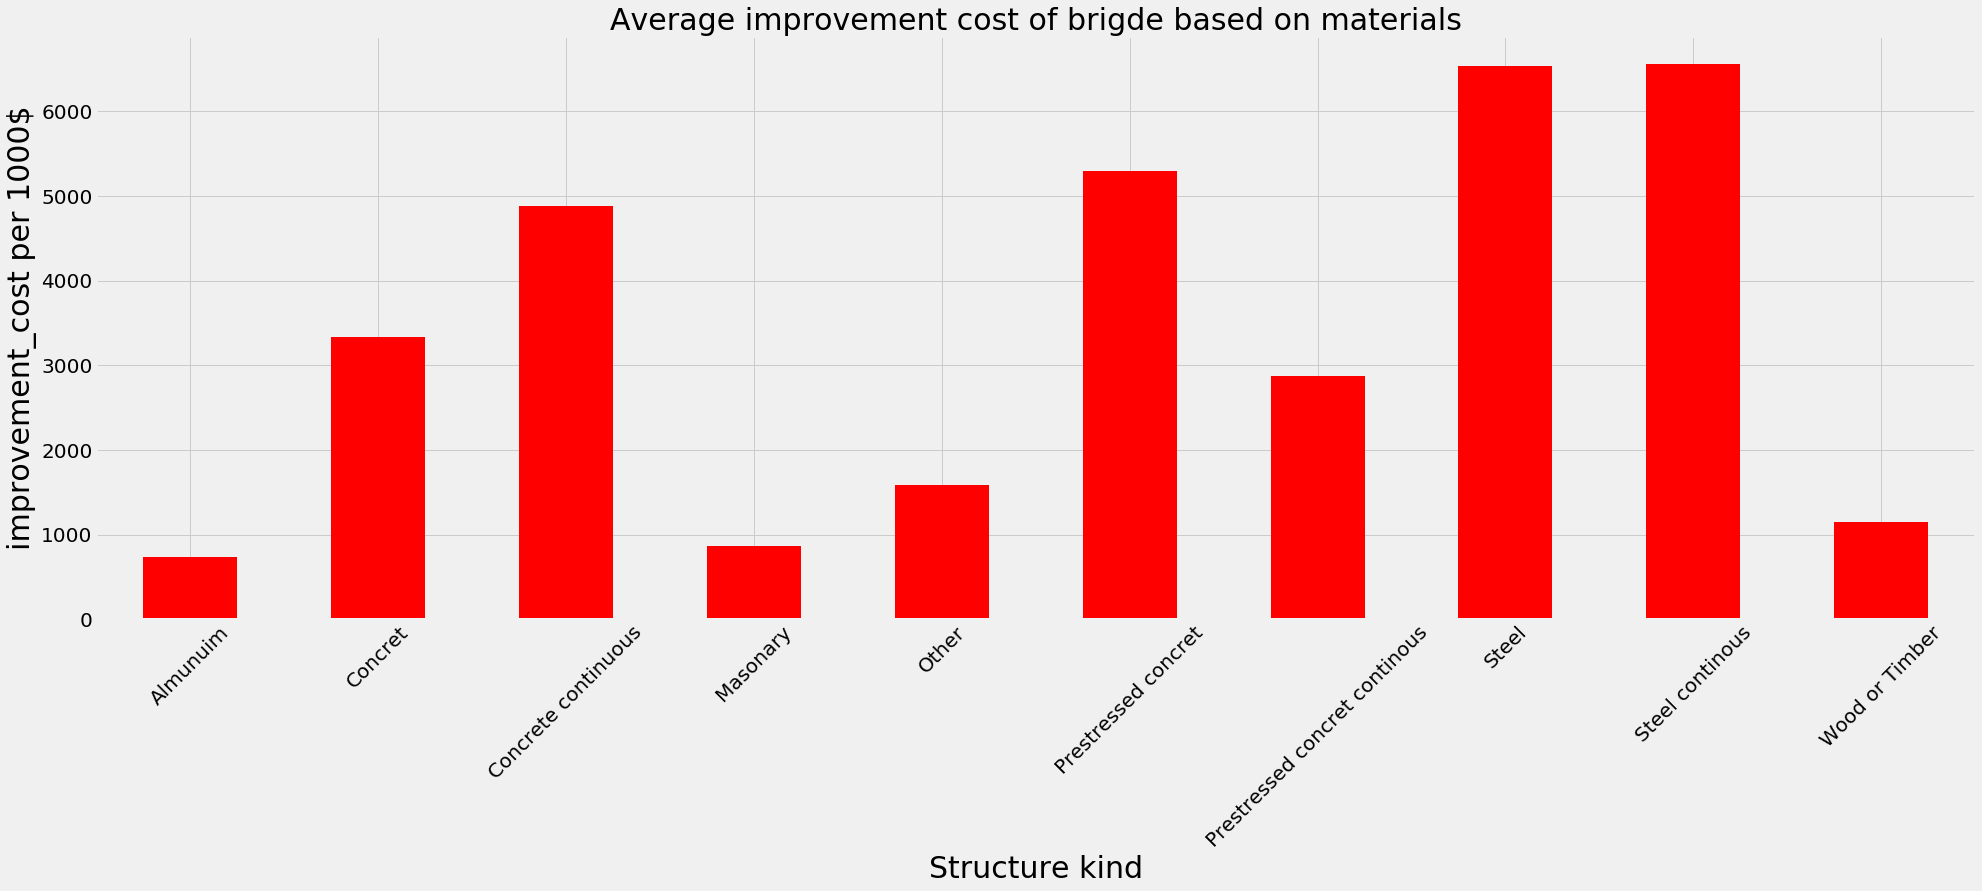

In [59]:
plt.figure(figsize=(30,10))
plt.style.use('fivethirtyeight')
df.groupby('STRUCTURE_KIND_043A')['TOTAL_IMP_COST_096'].mean().plot(kind='bar',color = 'r',)
plt.xlabel('Structure kind',fontsize = 30)
plt.xticks(fontsize=20,rotation=45)
plt.yticks(fontsize=20)
plt.ylabel('improvement_cost per 1000$', fontsize=30)
plt.title('Average improvement cost of brigde based on materials', fontsize = 30)

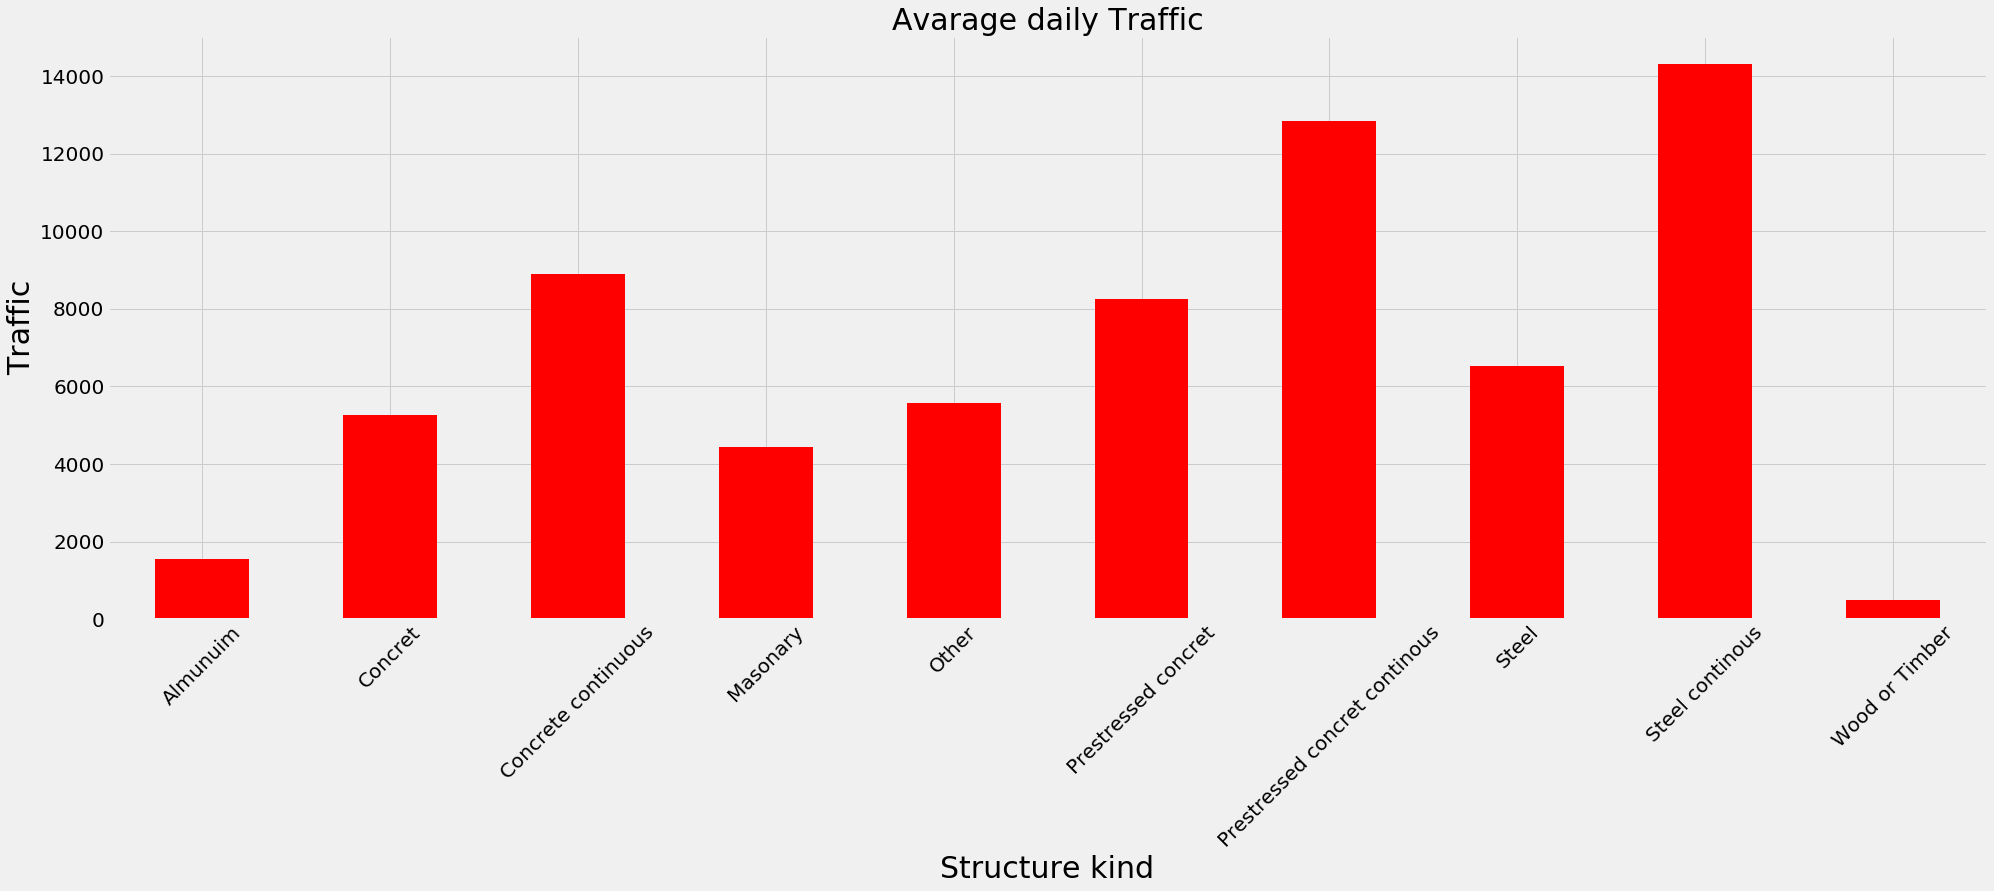

In [60]:
plt.figure(figsize=(30,10))
plt.style.use('fivethirtyeight')
df.groupby('STRUCTURE_KIND_043A')['ADT_029'].mean().plot(kind='bar',color = 'r',)
plt.xlabel('Structure kind',fontsize = 30)
plt.xticks(fontsize=20,rotation=45)
plt.yticks(fontsize=20)
plt.ylabel('Traffic', fontsize=30)
plt.title('Avarage daily Traffic', fontsize = 30)
plt.savefig('Average traffic')

Text(101.05000000000001, 0.5, 'Frequency ')

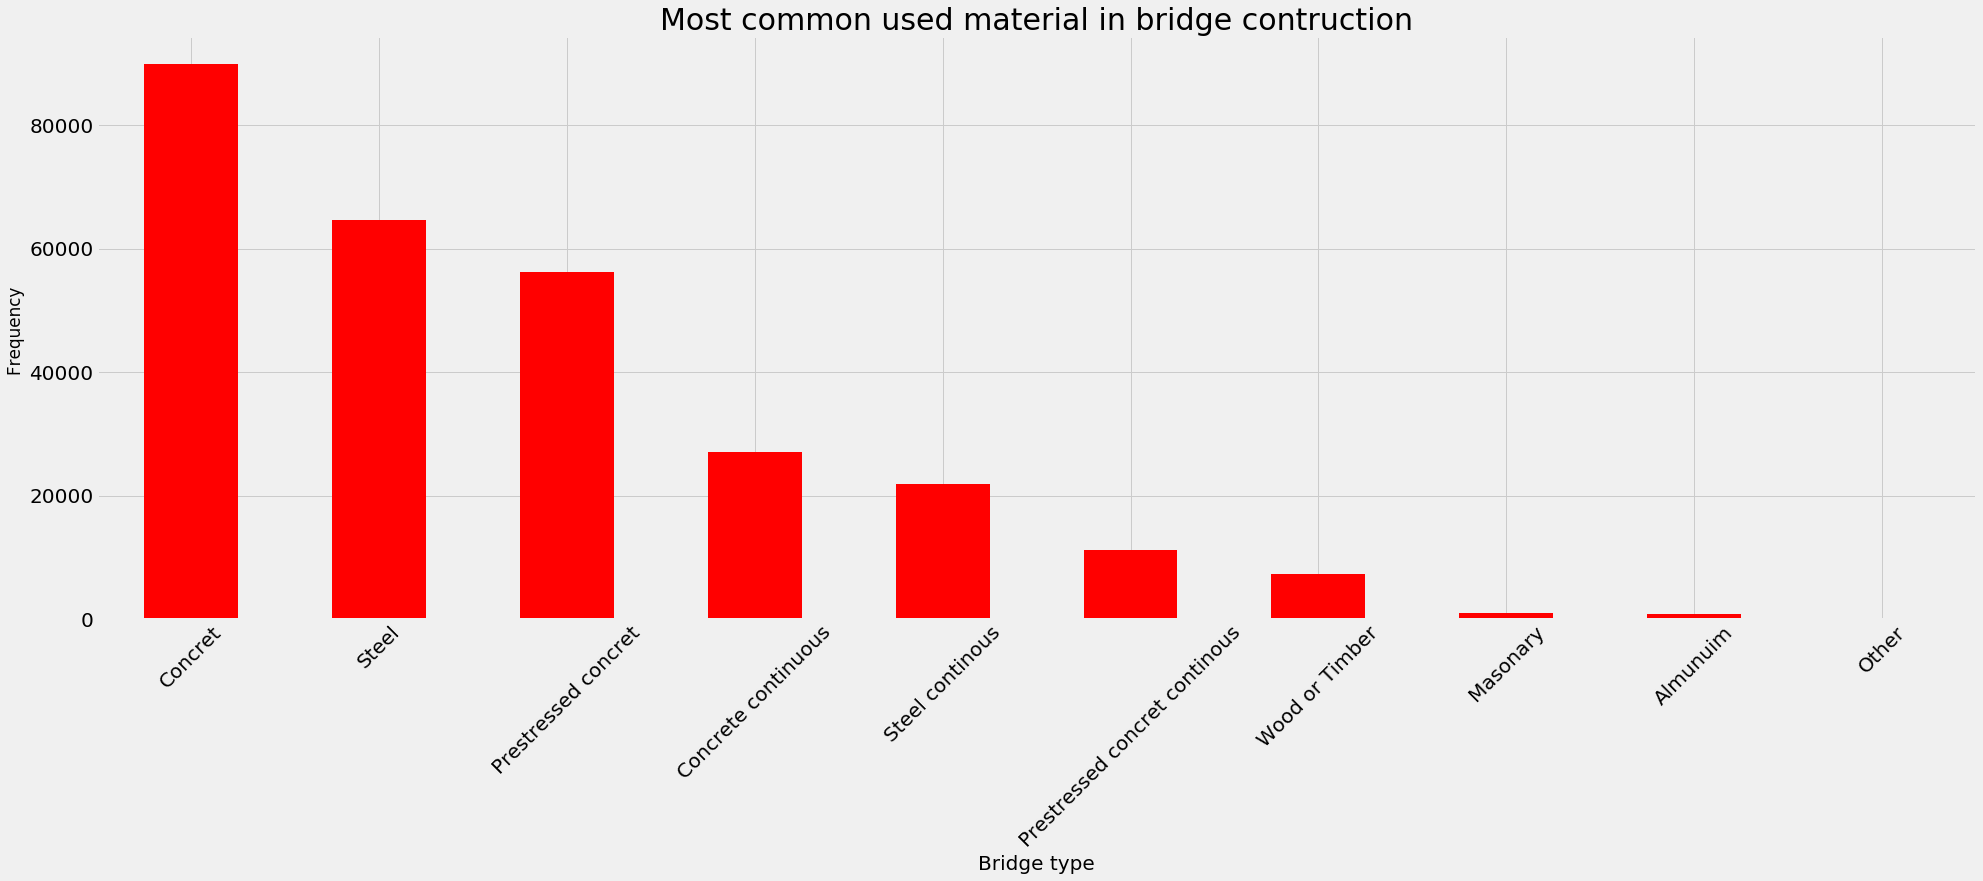

In [61]:
plt.figure(figsize=(30,10))
df['STRUCTURE_KIND_043A'].value_counts().plot(kind='bar',color='r')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20,rotation=45)
plt.title('Most common used material in bridge contruction', fontsize = 30)
plt.savefig('mostuse')
plt.xlabel('Bridge type', fontsize =20)
plt.ylabel('Frequency ')

Text(0.5, 1.0, 'Overall condition rating of bridges on the scale of 1 to 10')

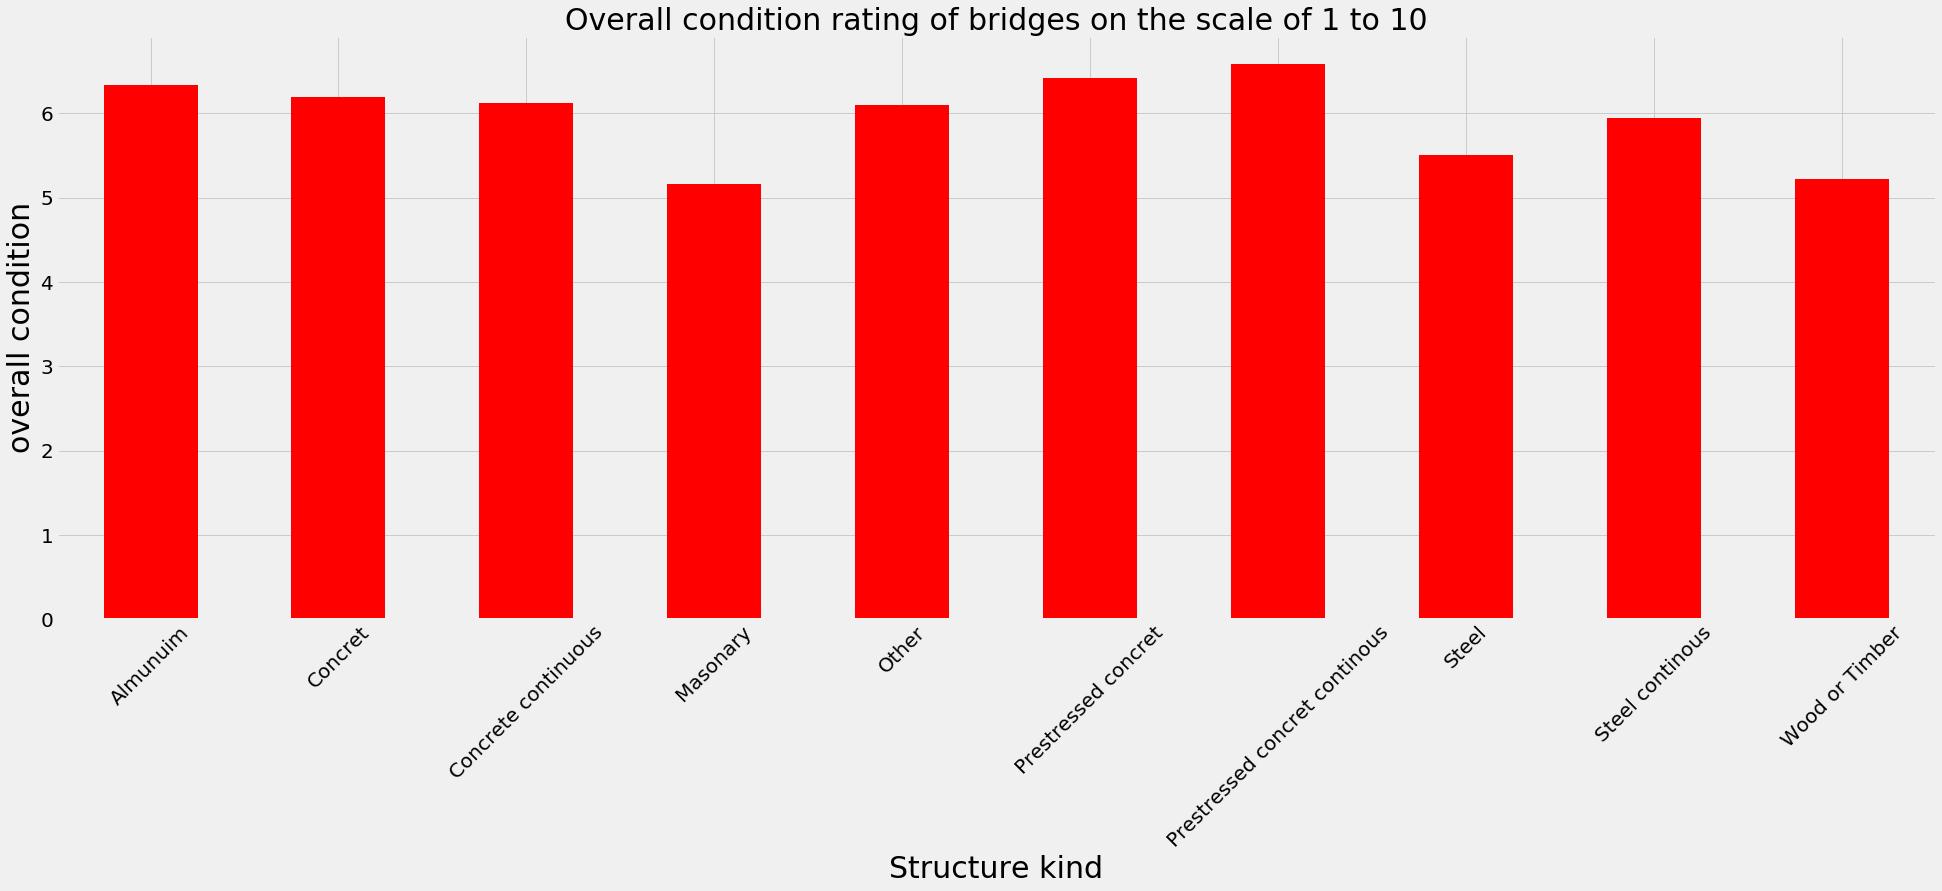

In [62]:
plt.figure(figsize=(30,10))
plt.style.use('fivethirtyeight')
df.groupby('STRUCTURE_KIND_043A')['CAT23'].mean().plot(kind='bar',color = 'r',)
plt.xlabel('Structure kind',fontsize = 30)
plt.xticks(fontsize=20,rotation=45)
plt.yticks(fontsize=20)
plt.ylabel('overall condition', fontsize=30)
plt.title('Overall condition rating of bridges on the scale of 1 to 10', fontsize = 30)

Text(0.5, 1.0, 'Overall condition of bridges on the scale of 1 to 10')

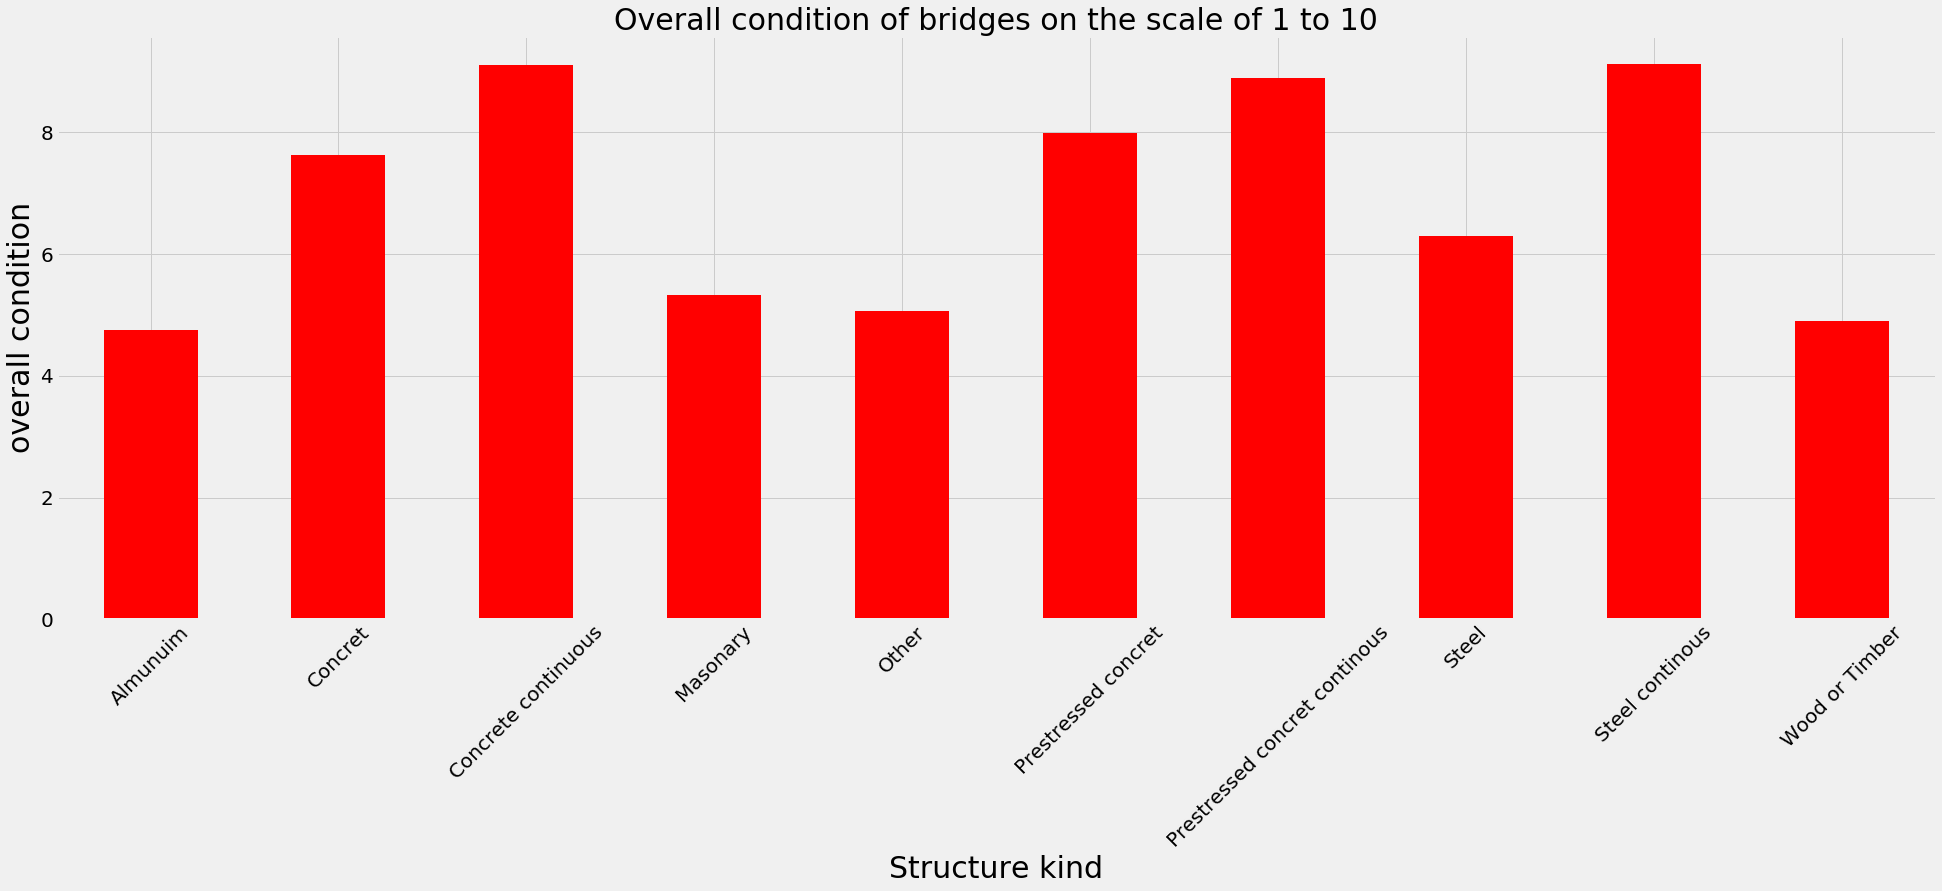

In [63]:
plt.figure(figsize=(30,10))
plt.style.use('fivethirtyeight')
df.groupby('STRUCTURE_KIND_043A')['PERCENT_ADT_TRUCK_109'].mean().plot(kind='bar',color = 'r',)
plt.xlabel('Structure kind',fontsize = 30)
plt.xticks(fontsize=20,rotation=45)
plt.yticks(fontsize=20)
plt.ylabel('overall condition', fontsize=30)
plt.title('Overall condition of bridges on the scale of 1 to 10', fontsize = 30)

Text(0.5, 1.0, 'frenquency inspection per month')

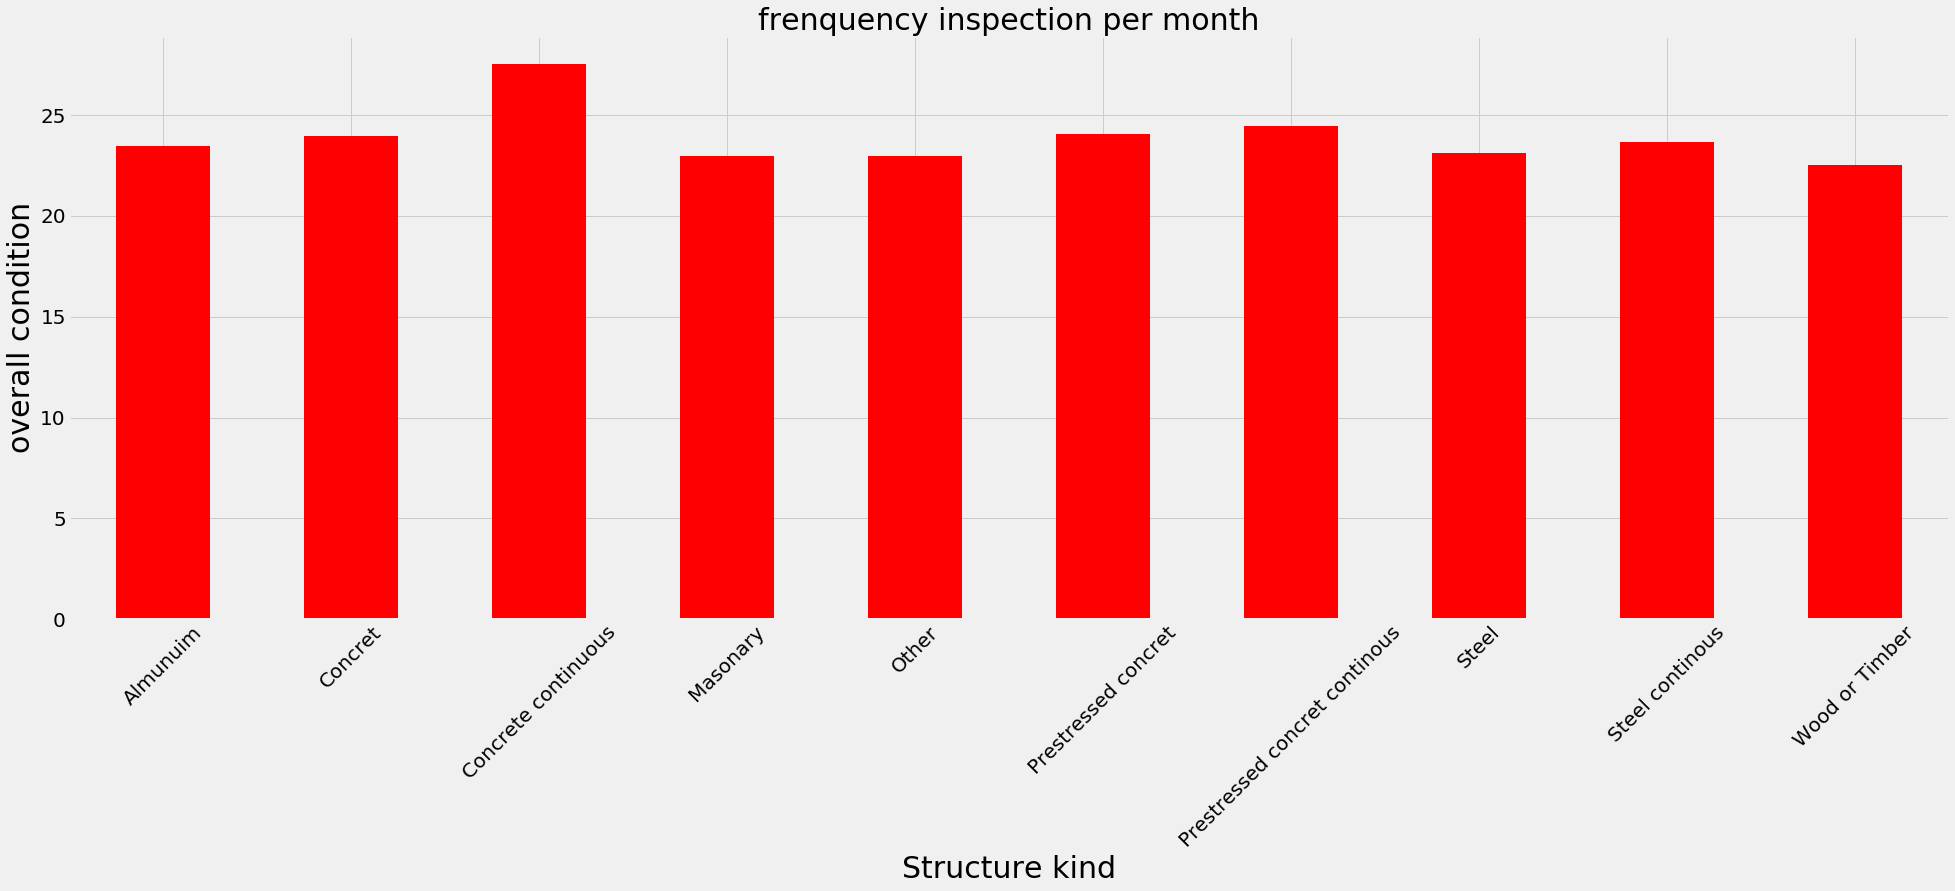

In [64]:
plt.figure(figsize=(30,10))
plt.style.use('fivethirtyeight')
df.groupby('STRUCTURE_KIND_043A')['INSPECT_FREQ_MONTHS_091'].mean().plot(kind='bar',color = 'r',)
plt.xlabel('Structure kind',fontsize = 30)
plt.xticks(fontsize=20,rotation=45)
plt.yticks(fontsize=20)
plt.ylabel('overall condition', fontsize=30)
plt.title('frenquency inspection per month', fontsize = 30)

Text(0.5, 1.0, 'Deck Area')

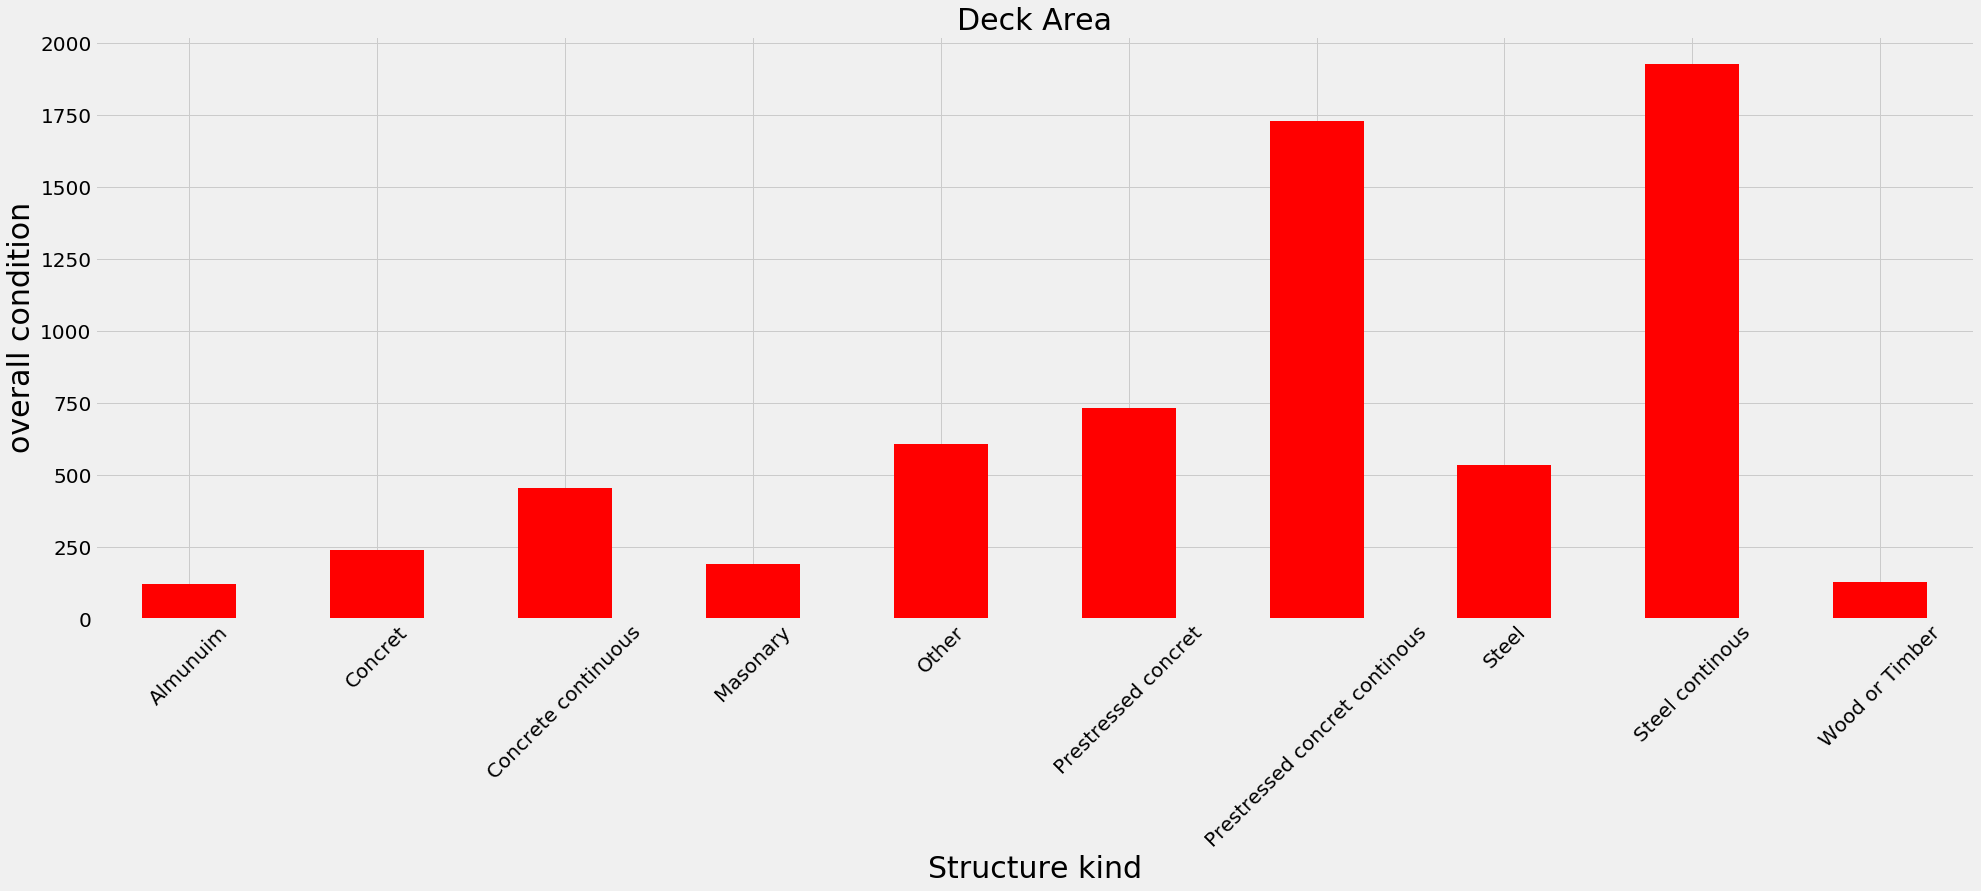

In [65]:
plt.figure(figsize=(30,10))
plt.style.use('fivethirtyeight')
df.groupby('STRUCTURE_KIND_043A')['CAT29'].mean().plot(kind='bar',color = 'r',)
plt.xlabel('Structure kind',fontsize = 30)
plt.xticks(fontsize=20,rotation=45)
plt.yticks(fontsize=20)
plt.ylabel('overall condition', fontsize=30)
plt.title('Deck Area', fontsize = 30)

Text(0.5, 1.0, 'Maximum allowable capacity vs actual capacity')

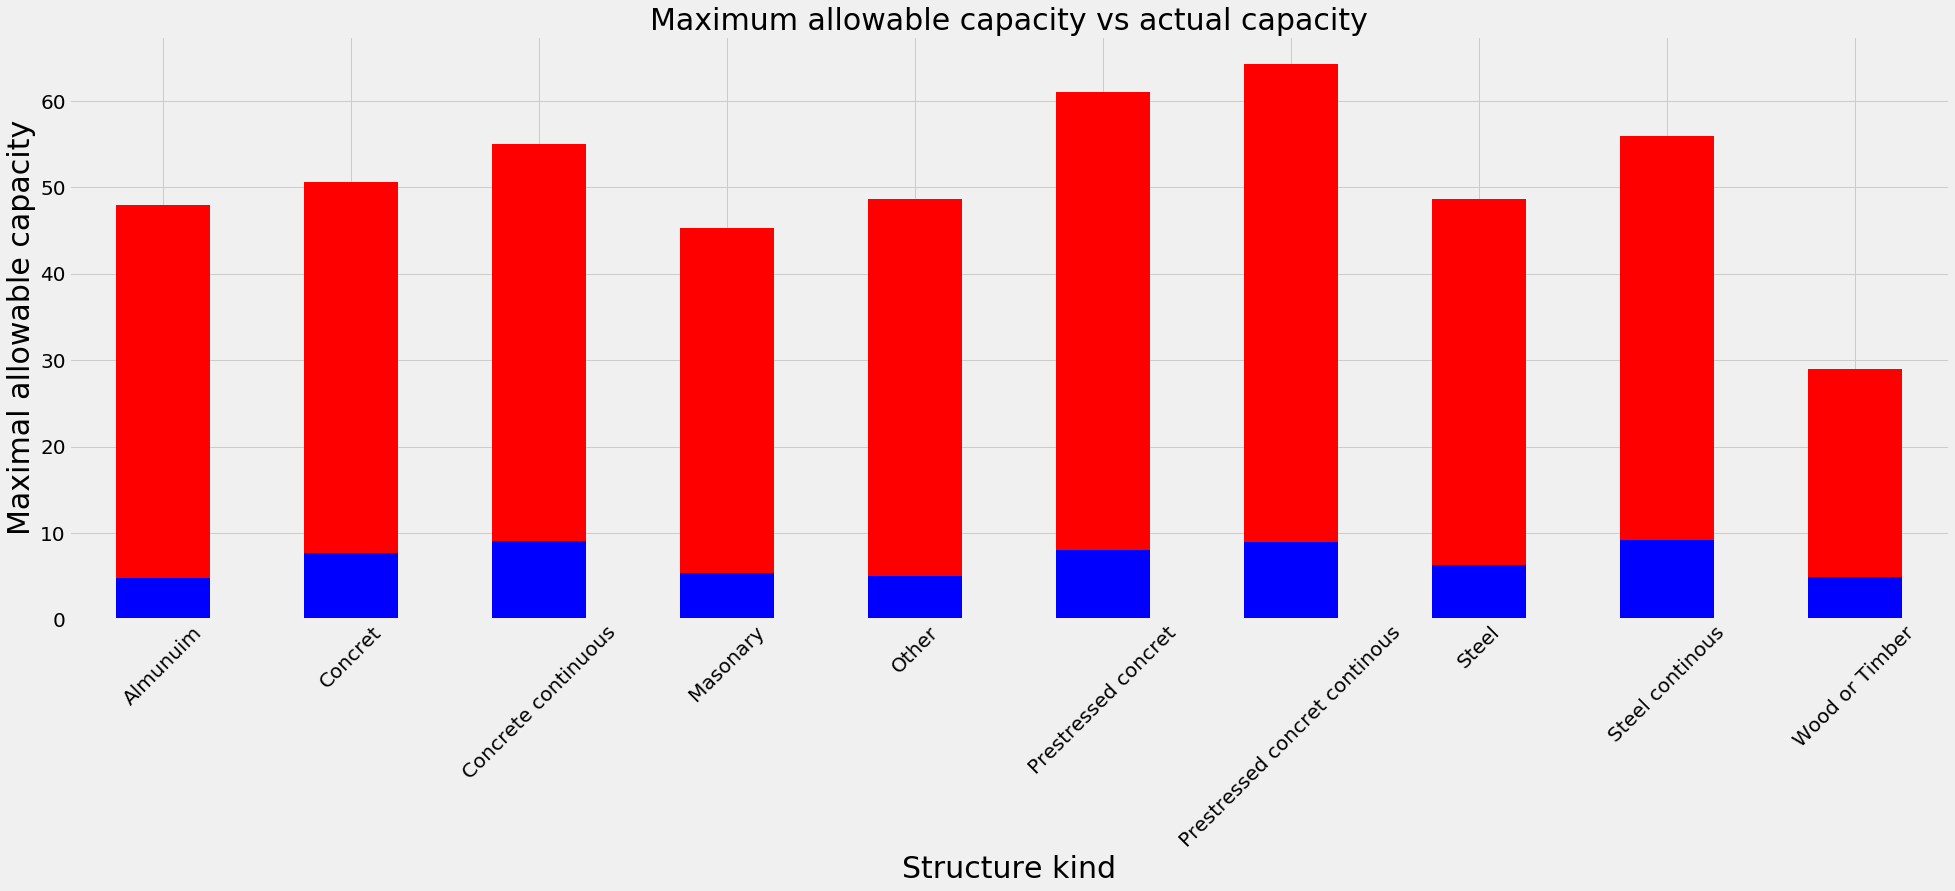

In [66]:
plt.figure(figsize=(30,10))
plt.style.use('fivethirtyeight')
df.groupby('STRUCTURE_KIND_043A')['OPERATING_RATING_064'].mean().plot(kind='bar',color = 'r',)
df.groupby('STRUCTURE_KIND_043A')['PERCENT_ADT_TRUCK_109'].mean().plot(kind='bar',color = 'b',)
plt.xlabel('Structure kind',fontsize = 30)
plt.xticks(fontsize=20,rotation=45)
plt.yticks(fontsize=20)
plt.ylabel('Maximal allowable capacity', fontsize=30)
plt.title('Maximum allowable capacity vs actual capacity', fontsize = 30)

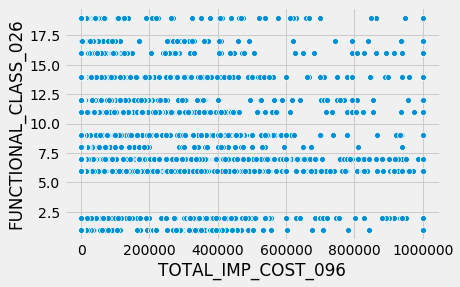

In [67]:
sns.scatterplot(df['TOTAL_IMP_COST_096'], df['FUNCTIONAL_CLASS_026'])

In [68]:
df['YEAR_BUILT_027'].astype(int)

0         1999
1         2002
2         1942
3         1937
4         1924
          ... 
280369    2008
280370    2015
280371    2014
280372    2015
280373    1987
Name: YEAR_BUILT_027, Length: 280374, dtype: int32

In [69]:
df_g = df[['YEAR_BUILT_027','TOTAL_IMP_COST_096']]

In [70]:
df_g

,YEAR_BUILT_027,TOTAL_IMP_COST_096
0,1999.0,0.0
1,2002.0,0.0
2,1942.0,2.0
3,1937.0,60000.0
4,1924.0,45000.0
...,...,...
280369,2008.0,0.0
280370,2015.0,0.0
280371,2014.0,258.0
280372,2015.0,0.0


In [71]:
df['STRUCTURE_LEN_MT_049'].mean()

44.178689892784945

In [72]:
df['MAX_SPAN_LEN_MT_048'].mean()

14.94835862098569

In [73]:
df['lat'] = df['LAT_016']*10**-6

In [74]:
df['lat']

0         31.061094
1         31.062020
2         32.174330
3         34.481800
4         34.480000
            ...    
280369    18.182996
280370    18.224348
280371    18.020896
280372    18.144916
280373    18.250840
Name: lat, Length: 280374, dtype: float64

In [75]:
df['long'] = df['LONG_017']*-10**-6
df_geo = df[['long','lat','STRUCTURE_KIND_043A']]

In [76]:
from sklearn.utils import shuffle
from shapely.geometry import Point
from shapely.geometry import polygon
from geopandas import GeoDataFrame
#import contextily as ctx

In [77]:
df_geo = shuffle(df_geo)

In [78]:
gdf = geopandas.GeoDataFrame(
    df_geo , geometry=geopandas.points_from_xy(df_geo['long'], df_geo['lat']),crs  ={'init': 'epsg:4326'})


In [79]:
print(gdf)

              long        lat  STRUCTURE_KIND_043A  \
30250   -90.060219  35.485292              Concret   
180428  -98.531654  35.192804                Steel   
66955   -82.214294  32.143210              Concret   
162569  -82.351365  38.320021              Concret   
6690    -87.524479  30.393622              Concret   
...            ...        ...                  ...   
41966  -105.054329  39.394983  Prestressed concret   
192305  -75.380924  40.113156                Steel   
181875  -98.344448  34.330065  Prestressed concret   
197023  -80.091080  41.025567       Wood or Timber   
216510  -97.423556  45.464188                Steel   

                           geometry  
30250    POINT (-90.06022 35.48529)  
180428   POINT (-98.53165 35.19280)  
66955    POINT (-82.21429 32.14321)  
162569   POINT (-82.35137 38.32002)  
6690     POINT (-87.52448 30.39362)  
...                             ...  
41966   POINT (-105.05433 39.39498)  
192305   POINT (-75.38092 40.11316)  
181875   

In [80]:
type(gdf.geometry[0])

shapely.geometry.point.Point

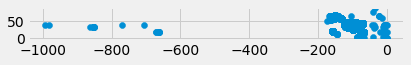

In [81]:
gdf.geometry.plot()

In [82]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [88]:
#world

In [89]:
#gdf['STRUCTURE_KIND_043A']

Text(0.5, 1, 'Bridges')

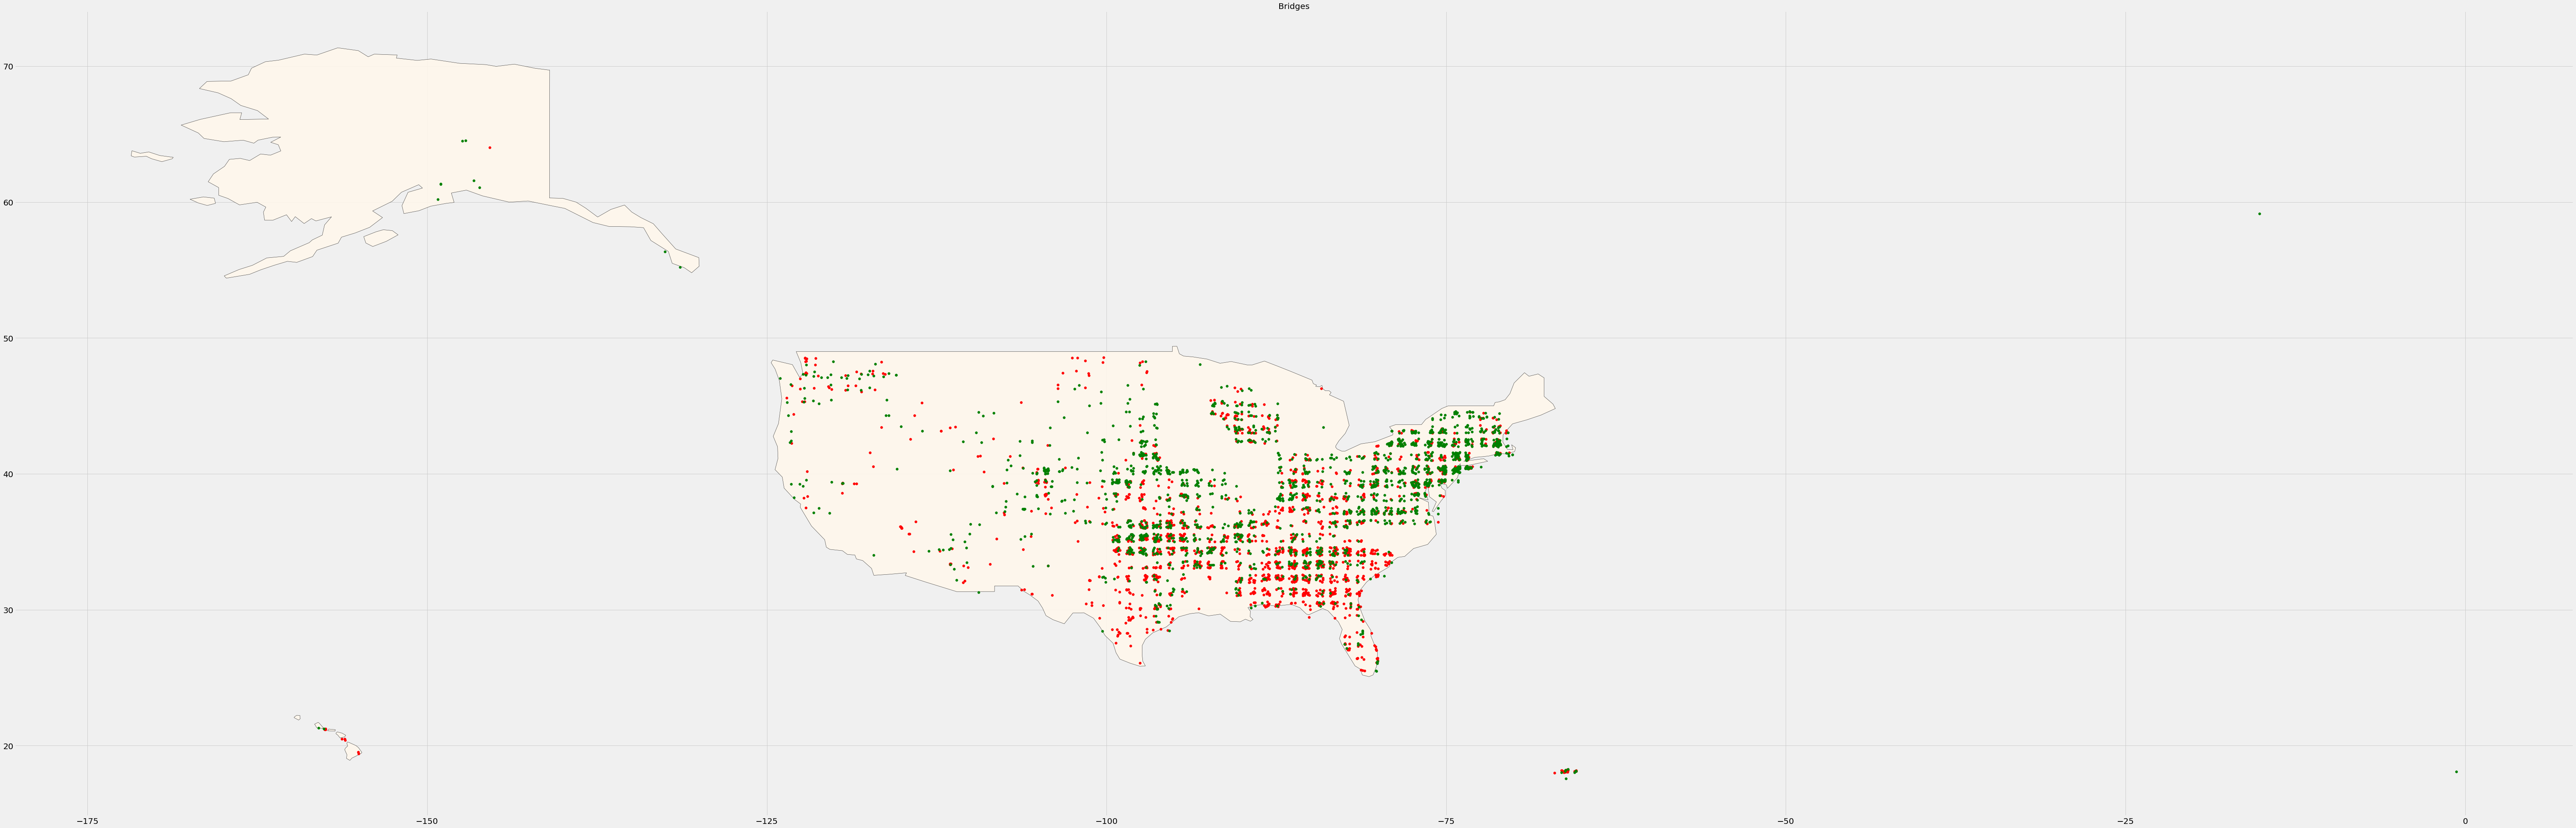

In [92]:
#plt.figure(figsize=(200,50))
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ax = world[world.name == 'United States of America'].plot(
   color='b', edgecolor='black',figsize=(100,50), cmap='OrRd',alpha=0.9,linewidth=0.6,)
gdf.loc[gdf['STRUCTURE_KIND_043A']=='Concret'][:2000].plot(ax=ax, color='red')
gdf.loc[gdf['STRUCTURE_KIND_043A']=='Steel'][:2000].plot(ax=ax, color='green')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title('Bridges')